In [1]:
import numpy as np

import keras
from keras import models
from keras import layers
from keras import activations
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

word_index = imdb.get_word_index()
reverse_word_index = {index: word for (word, index) in word_index.items()}

In [3]:
def decode_review(sample):
    return ' '.join((reverse_word_index.get(index - 3, '?') for index in sample))


def vectorize_sequences(sequences, dimension=NUM_WORDS):
    table = np.zeros(shape=(len(sequences), dimension), dtype=np.float32)
    for i, seq in enumerate(sequences):
        table[i, seq] = 1.0
    return table


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation=activations.relu, input_shape=(NUM_WORDS,)))
model.add(layers.Dense(units=16, activation=activations.relu))
model.add(layers.Dense(units=1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

print(history_dict.keys())

In [6]:
def plot_history(history):
    hist_dict = history.history
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']
    acc_values = hist_dict['binary_accuracy']
    val_acc_values = hist_dict['val_binary_accuracy']

    epochs = range(1, len(loss_values) + 1)

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss_values, 'bo')
    plt.plot(epochs, val_loss_values, 'b+')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc_values, 'bo')
    plt.plot(epochs, val_acc_values, 'b+')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()

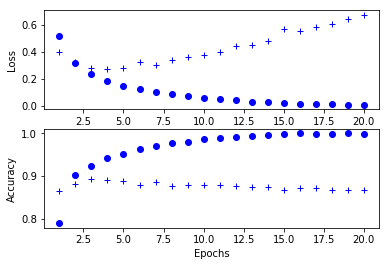

In [7]:
plot_history(history)

In [8]:
model.predict(x_test)

array([[  9.99705374e-01],
       [  9.99641061e-01],
       [  9.99998689e-01],
       ..., 
       [  9.66318071e-01],
       [  1.87966143e-05],
       [  9.10963953e-01]], dtype=float32)

Try 3 dense layers

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 0s - loss: 0.5199 - binary_accuracy: 0.7856 - val_loss: 0.4429 - val_binary_accuracy: 0.8061
Epoch 2/20
15000/15000 [==============================] - 0s - loss: 0.3032 - binary_accuracy: 0.9018 - val_loss: 0.3057 - val_binary_accuracy: 0.8857
Epoch 3/20
15000/15000 [==============================] - 0s - loss: 0.2197 - binary_accuracy: 0.9285 - val_loss: 0.3089 - val_binary_accuracy: 0.8749
Epoch 4/20
15000/15000 [==============================] - 0s - loss: 0.1708 - binary_accuracy: 0.9450 - val_loss: 0.2764 - val_binary_accuracy: 0.8885
Epoch 5/20
15000/15000 [==============================] - 0s - loss: 0.1369 - binary_accuracy: 0.9559 - val_loss: 0.3048 - val_binary_accuracy: 0.8790
Epoch 6/20
15000/15000 [==============================] - 0s - loss: 0.1130 - binary_accuracy: 0.9640 - val_loss: 0.3172 - val_binary_accuracy: 0.8773
Epoch 7/20
15000/15000 [====================

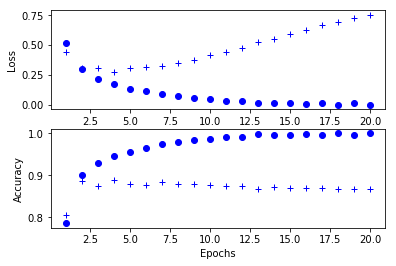

In [9]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation=activations.relu, input_shape=(NUM_WORDS,)))
model.add(layers.Dense(units=16, activation=activations.relu))
model.add(layers.Dense(units=16, activation=activations.relu))
model.add(layers.Dense(units=1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

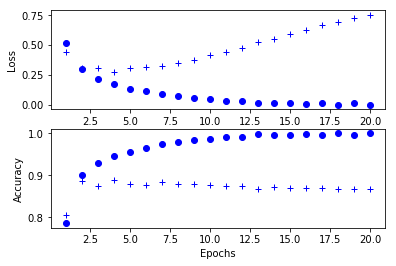

In [10]:
plot_history(history)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 0s - loss: 0.6137 - binary_accuracy: 0.6601 - val_loss: 0.4894 - val_binary_accuracy: 0.8512
Epoch 2/20
15000/15000 [==============================] - 0s - loss: 0.4990 - binary_accuracy: 0.7677 - val_loss: 0.3986 - val_binary_accuracy: 0.8684
Epoch 3/20
15000/15000 [==============================] - 0s - loss: 0.4190 - binary_accuracy: 0.8267 - val_loss: 0.3348 - val_binary_accuracy: 0.8785
Epoch 4/20
15000/15000 [==============================] - 0s - loss: 0.3615 - binary_accuracy: 0.8597 - val_loss: 0.2959 - val_binary_accuracy: 0.8861
Epoch 5/20
15000/15000 [==============================] - 0s - loss: 0.3216 - binary_accuracy: 0.8837 - val_loss: 0.2821 - val_binary_accuracy: 0.8888
Epoch 6/20
15000/15000 [==============================] - 0s - loss: 0.2760 - binary_accuracy: 0.9006 - val_loss: 0.2732 - val_binary_accuracy: 0.8913
Epoch 7/20
15000/15000 [====================

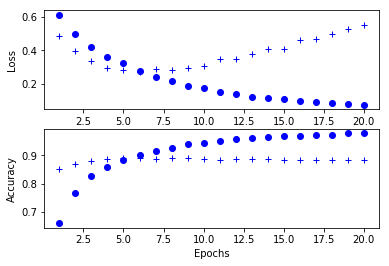

In [12]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation=activations.relu, input_shape=(NUM_WORDS,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=16, activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
plot_history(history)

Dropout + L2

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 0s - loss: 0.6741 - binary_accuracy: 0.6153 - val_loss: 0.6125 - val_binary_accuracy: 0.7124
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.5862 - binary_accuracy: 0.7709 - val_loss: 0.5510 - val_binary_accuracy: 0.7714
Epoch 3/20
15000/15000 [==============================] - 0s - loss: 0.5317 - binary_accuracy: 0.8445 - val_loss: 0.5025 - val_binary_accuracy: 0.8533
Epoch 4/20
15000/15000 [==============================] - 0s - loss: 0.4892 - binary_accuracy: 0.8804 - val_loss: 0.4861 - val_binary_accuracy: 0.8445
Epoch 5/20
15000/15000 [==============================] - 0s - loss: 0.4552 - binary_accuracy: 0.8961 - val_loss: 0.4691 - val_binary_accuracy: 0.8601
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.4224 - binary_accuracy: 0.9091 - val_loss: 0.4356 - val_binary_accuracy: 0.8816
Epoch 7/20
15000/15000 [====================

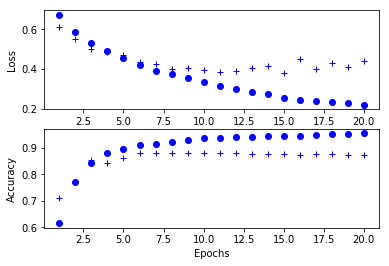

In [13]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(units=16, activation=activations.relu, kernel_regularizer=regularizers.l2(0.001), input_shape=(NUM_WORDS,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=16, activation=activations.relu, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
plot_history(history)

Dropout + L2 + less units

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 0s - loss: 0.6856 - binary_accuracy: 0.5806 - val_loss: 0.6119 - val_binary_accuracy: 0.8395
Epoch 2/20
15000/15000 [==============================] - 0s - loss: 0.6251 - binary_accuracy: 0.6599 - val_loss: 0.5538 - val_binary_accuracy: 0.8653
Epoch 3/20
15000/15000 [==============================] - 0s - loss: 0.5854 - binary_accuracy: 0.6987 - val_loss: 0.4952 - val_binary_accuracy: 0.8721
Epoch 4/20
15000/15000 [==============================] - 0s - loss: 0.5512 - binary_accuracy: 0.7242 - val_loss: 0.4662 - val_binary_accuracy: 0.8752
Epoch 5/20
15000/15000 [==============================] - 0s - loss: 0.5208 - binary_accuracy: 0.7496 - val_loss: 0.4310 - val_binary_accuracy: 0.8818
Epoch 6/20
15000/15000 [==============================] - 0s - loss: 0.5001 - binary_accuracy: 0.7670 - val_loss: 0.3950 - val_binary_accuracy: 0.8811
Epoch 7/20
15000/15000 [====================

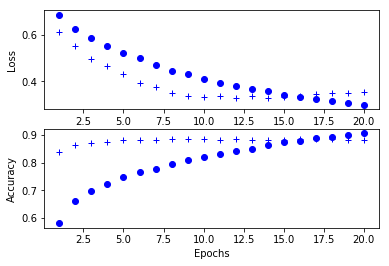

In [14]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(units=8, activation=activations.relu, kernel_regularizer=regularizers.l2(0.001), input_shape=(NUM_WORDS,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=8, activation=activations.relu, kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
plot_history(history)

Even less units

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 0s - loss: 0.6617 - binary_accuracy: 0.6052 - val_loss: 0.5974 - val_binary_accuracy: 0.8353
Epoch 2/20
15000/15000 [==============================] - 0s - loss: 0.5978 - binary_accuracy: 0.6989 - val_loss: 0.5496 - val_binary_accuracy: 0.8467
Epoch 3/20
15000/15000 [==============================] - 0s - loss: 0.5527 - binary_accuracy: 0.7395 - val_loss: 0.4898 - val_binary_accuracy: 0.8747
Epoch 4/20
15000/15000 [==============================] - 0s - loss: 0.5228 - binary_accuracy: 0.7604 - val_loss: 0.4449 - val_binary_accuracy: 0.8785
Epoch 5/20
15000/15000 [==============================] - 0s - loss: 0.4966 - binary_accuracy: 0.7783 - val_loss: 0.4201 - val_binary_accuracy: 0.8839
Epoch 6/20
15000/15000 [==============================] - 0s - loss: 0.4754 - binary_accuracy: 0.7979 - val_loss: 0.3897 - val_binary_accuracy: 0.8833
Epoch 7/20
15000/15000 [====================

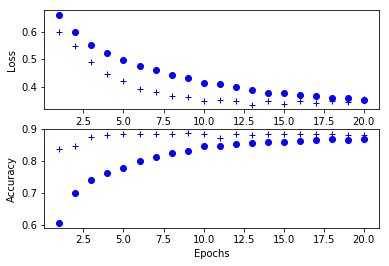

In [16]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(units=8, activation=activations.relu, kernel_regularizer=regularizers.l2(0.0005), input_shape=(NUM_WORDS,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=4, activation=activations.relu, kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x=partial_x_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
print('Final test accuracy: ', model.evaluate(x=x_test, y=y_test))
plot_history(history)